In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Dense, LSTM, Embedding, Activation
import numpy as np
from tensorflow.keras.datasets import imdb

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = None, index_from=3)

In [3]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
word_index = imdb.get_word_index() # key_word,value_index dic
reverse_index = dict([(value, key) for (key, value) in word_index.items()]) # key_index,value_word dic
decoded = " ".join( [reverse_index.get(i-3, "#") for i in X_train[0]] )
print(decoded) 

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be

In [5]:
print(len(X_train[0]))

218


In [6]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [7]:
y_train[0]

1

In [8]:
num_classes = max(y_train) + 1
print(num_classes)

2


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [10]:
max_num = 10000
tokenizer = Tokenizer(num_words=max_num)
tokenizer.fit_on_sequences(X_train)
X_train = tokenizer.sequences_to_matrix(X_train, mode = 'tfidf')
X_test = tokenizer.sequences_to_matrix(X_test, mode = 'tfidf')

In [11]:
print(X_train[0][4])

2.5855967311039936


In [12]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train.shape

(25000, 2)

In [13]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3,shuffle = True)
kf

KFold(n_splits=3, random_state=None, shuffle=True)

## find out the overfitting model

In [15]:
units = range(100,300,10)
loss_train = []
acc_train = []
loss_val = []
acc_val = []
for num in units:
    model = Sequential()
    model.add(Dense(num,input_shape = (max_num,)))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    loss_val_cv = 0
    acc_val_cv = 0
    loss_train_cv = 0
    acc_train_cv = 0
    for train_cv_index, val_index in kf.split(X_train):
        X_train_cv = X_train[train_cv_index]
        y_train_cv = y_train[train_cv_index]
        X_val_cv = X_train[val_index]
        y_val_cv = y_train[val_index]
        hist = model.fit(X_train_cv,y_train_cv,batch_size=200, epochs = 3)
        loss_train_cv = loss_train_cv + hist.history.get('loss')[-1]
        acc_train_cv = acc_train_cv + hist.history.get('acc')[-1]
        score_val_cv = model.evaluate(X_val_cv,y_val_cv, batch_size=200, verbose = 1)
        loss_val_cv = loss_val_cv + score_val_cv[0]
        acc_val_cv = acc_val_cv + score_val_cv[1]
    loss_val.append(loss_val_cv/3)
    acc_val.append(acc_val_cv/3)
    loss_train.append(loss_train_cv/3)
    acc_train.append(acc_train_cv/3)
    

Epoch 1/3
16666/16666 [==============================] - 6s 348us/step - loss: 0.3507 - acc: 0.8497
Epoch 2/3
16666/16666 [==============================] - 5s 313us/step - loss: 0.0815 - acc: 0.9764
Epoch 3/3
8334/8334 [==============================] - 2s 197us/step
Epoch 1/3
16667/16667 [==============================] - 5s 312us/step - loss: 0.1807 - acc: 0.9381
Epoch 2/3
16667/16667 [==============================] - 5s 306us/step - loss: 0.0318 - acc: 0.9924
Epoch 3/3
8333/8333 [==============================] - 1s 167us/step
Epoch 1/3
16667/16667 [==============================] - 5s 305us/step - loss: 0.0291 - acc: 0.9914
Epoch 2/3
16667/16667 [==============================] - 5s 310us/step - loss: 0.0068 - acc: 0.9994
Epoch 3/3
8333/8333 [==============================] - 2s 191us/step
Epoch 1/3
16666/16666 [==============================] - 6s 375us/step - loss: 0.3582 - acc: 0.8471
Epoch 2/3
16666/16666 [==============================] - 5s 327us/step - loss: 0.0808 - acc: 

8333/8333 [==============================] - 2s 210us/step
Epoch 1/3
16666/16666 [==============================] - 10s 600us/step - loss: 0.3489 - acc: 0.8510
Epoch 2/3
16666/16666 [==============================] - 9s 513us/step - loss: 0.0567 - acc: 0.9848
Epoch 3/3
8334/8334 [==============================] - 2s 257us/step
Epoch 1/3
16667/16667 [==============================] - 9s 512us/step - loss: 0.1816 - acc: 0.9365
Epoch 2/3
16667/16667 [==============================] - 9s 511us/step - loss: 0.0247 - acc: 0.9956
Epoch 3/3
8333/8333 [==============================] - 2s 213us/step
Epoch 1/3
16667/16667 [==============================] - 9s 521us/step - loss: 0.0194 - acc: 0.9952
Epoch 2/3
16667/16667 [==============================] - 9s 523us/step - loss: 0.0038 - acc: 0.9999
Epoch 3/3
8333/8333 [==============================] - 2s 198us/step
Epoch 1/3
16666/16666 [==============================] - ETA: 0s - loss: 0.3548 - acc: 0.848 - 11s 636us/step - loss: 0.3543 - acc: 0

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd

In [17]:
ix = units
loss_train= pd.Series(loss_train, index = ix)
loss_val = pd.Series(loss_val, index = ix)
acc_train = pd.Series(acc_train, index = ix)
acc_val = pd.Series(acc_val, index = ix)

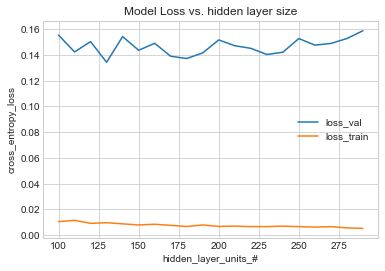

In [27]:
fig = plt.figure()
ax = plt.axes()
ax.plot(loss_val, label = 'loss_val')
ax.plot(loss_train, label = 'loss_train')
ax.legend()
plt.xlabel('hidden_layer_units_#') 
plt.ylabel('cross_entropy_loss') 
plt.title('Model Loss vs. hidden layer size')
fig.savefig("loss_cv.png",dpi = 400)

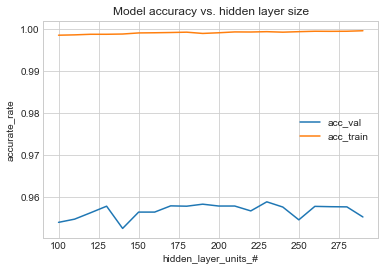

In [28]:
fig = plt.figure()
ax = plt.axes()
ax.plot(acc_val,label = 'acc_val')
ax.plot(acc_train, label = 'acc_train')
ax.legend()
plt.xlabel('hidden_layer_units_#') 
plt.ylabel('accurate_rate') 
plt.title('Model accuracy vs. hidden layer size')
fig.savefig("acc_cv.png",dpi=400)

In [ ]:
# overfitting, while hidden layer contains 250 nodes in this case
# first kind of regularization: dropout
# second kind of regularization: l1_norm_kernel_regularizer
# third kind of regularization: l2_norm_kernel_regularizer

In [48]:
# the baseline to compare with
model_overfitting = Sequential()
model_overfitting.add(Dense(250,input_shape = (max_num,)))
model_overfitting.add(Activation('relu'))
model_overfitting.add(Dense(num_classes))
model_overfitting.add(Activation('softmax'))
model_overfitting.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_overfitting = model_overfitting.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_overfitting = model_overfitting.evaluate(X_test,y_test, batch_size=200, verbose = 1)

base_train_acc = hist_overfitting.history.get('acc')[-1]
base_test_acc = score_overfitting[1]

Epoch 1/3
25000/25000 [==============================] - 13s 536us/step - loss: 0.3210 - acc: 0.8646
Epoch 2/3
25000/25000 [==============================] - 11s 435us/step - loss: 0.0665 - acc: 0.9803
Epoch 3/3
25000/25000 [==============================] - 6s 229us/step


In [49]:
print('The accurate rate of the overfitting model on training dataset is')
print(base_train_acc)
print('The accurate rate of the overfitting model on test dataset is')
print(base_test_acc)

The accurate rate of the overfitting model on training dataset is
0.9978400020599365
The accurate rate of the overfitting model on test dataset is
0.8704400014877319


In [29]:
# Save the weights
model_overfitting.save_weights('model_base_weights.h5')

# Save the model architecture
with open('model_base_architecture.json', 'w') as f:
    f.write(model_overfitting.to_json())

In [ ]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('model_base_architecture.json', 'r') as f:
     model_overfitting = model_from_json(f.read())

# Load weights into the new model
model_overfitting.load_weights('model_base_weights.h5')

In [44]:
from tensorflow.keras.layers import Dropout
rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
loss_train_drop = []
acc_train_drop = []
loss_val_drop = []
acc_val_drop = []
for r in rate:
    model_drop = Sequential()
    model_drop.add(Dense(250,input_shape = (max_num,)))
    model_drop.add(Activation('relu'))
    model_drop.add(Dropout(r))
    model_drop.add(Dense(num_classes))
    model_drop.add(Activation('softmax'))
    model_drop.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    loss_val_cv = 0
    acc_val_cv = 0
    loss_train_cv = 0
    acc_train_cv = 0
    for train_cv_index, val_index in kf.split(X_train):
        X_train_cv = X_train[train_cv_index]
        y_train_cv = y_train[train_cv_index]
        X_val_cv = X_train[val_index]
        y_val_cv = y_train[val_index]
        hist = model_drop.fit(X_train_cv,y_train_cv,batch_size=200, epochs = 3)
        loss_train_cv = loss_train_cv + hist.history.get('loss')[-1]
        acc_train_cv = acc_train_cv + hist.history.get('acc')[-1]
        score_val_cv = model_drop.evaluate(X_val_cv,y_val_cv, batch_size=200, verbose = 1)
        loss_val_cv = loss_val_cv + score_val_cv[0]
        acc_val_cv = acc_val_cv + score_val_cv[1]
    loss_val_drop.append(loss_val_cv/3)
    acc_val_drop.append(acc_val_cv/3)
    loss_train_drop.append(loss_train_cv/3)
    acc_train_drop.append(acc_train_cv/3)
    

Epoch 1/3
16666/16666 [==============================] - 10s 575us/step - loss: 0.3509 - acc: 0.8487
Epoch 2/3
16666/16666 [==============================] - 7s 439us/step - loss: 0.0665 - acc: 0.9796
Epoch 3/3
8334/8334 [==============================] - 2s 235us/step
Epoch 1/3
16667/16667 [==============================] - 7s 420us/step - loss: 0.1679 - acc: 0.9443
Epoch 2/3
16667/16667 [==============================] - 7s 417us/step - loss: 0.0240 - acc: 0.9945
Epoch 3/3
8333/8333 [==============================] - 1s 124us/step
Epoch 1/3
16667/16667 [==============================] - 7s 412us/step - loss: 0.0190 - acc: 0.9951
Epoch 2/3
16667/16667 [==============================] - 7s 422us/step - loss: 0.0036 - acc: 0.9998
Epoch 3/3
8333/8333 [==============================] - 1s 123us/step
Epoch 1/3
16666/16666 [==============================] - 9s 554us/step - loss: 0.3457 - acc: 0.8537
Epoch 2/3
16666/16666 [==============================] - 7s 412us/step - loss: 0.0728 - acc:

In [45]:
ix = rate
loss_train_drop= pd.Series(loss_train_drop, index = ix)
loss_val_drop = pd.Series(loss_val_drop, index = ix)
acc_train_drop = pd.Series(acc_train_drop, index = ix)
acc_val_drop = pd.Series(acc_val_drop, index = ix)

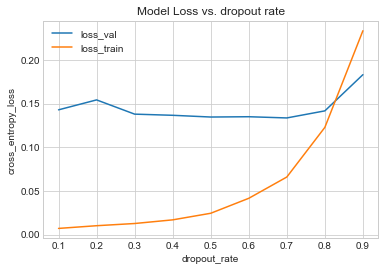

In [46]:
fig = plt.figure()
ax = plt.axes()
ax.plot(loss_val_drop, label = 'loss_val')
ax.plot(loss_train_drop, label = 'loss_train')
ax.legend()
plt.xlabel('dropout_rate') 
plt.ylabel('cross_entropy_loss') 
plt.title('Model Loss vs. dropout rate')
fig.savefig("drop_loss_cv.png",dpi = 400)

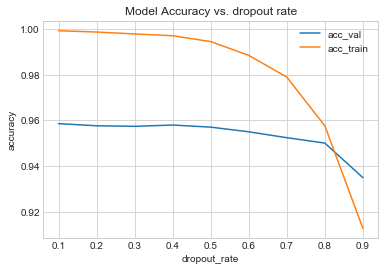

In [47]:
fig = plt.figure()
ax = plt.axes()
ax.plot(acc_val_drop, label = 'acc_val')
ax.plot(acc_train_drop, label = 'acc_train')
ax.legend()
plt.xlabel('dropout_rate') 
plt.ylabel('accuracy') 
plt.title('Model Accuracy vs. dropout rate')
fig.savefig("drop_acc_cv.png",dpi = 400)

In [26]:
from tensorflow.keras.layers import Dropout
model_drop = Sequential()
model_drop.add(Dense(250,input_shape = (max_num,)))
model_drop.add(Dropout(0.5))
model_drop.add(Activation('relu'))
model_drop.add(Dense(num_classes))
model_drop.add(Activation('softmax'))
model_drop.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_drop = model_drop.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_drop = model_drop.evaluate(X_test,y_test, batch_size=200, verbose = 1)

drop_train_acc = hist_drop.history.get('acc')[-1]
drop_test_acc = score_drop[1]

Epoch 1/3
25000/25000 [==============================] - 14s 568us/step - loss: 0.3484 - acc: 0.8506
Epoch 2/3
25000/25000 [==============================] - 13s 505us/step - loss: 0.1211 - acc: 0.9577
Epoch 3/3
25000/25000 [==============================] - 6s 250us/step


In [27]:
print('The accurate rate of the model with dropout(0.5) on training dataset is')
print(drop_train_acc)
print('The accurate rate of the model with dropout(0.5) on test dataset is')
print(drop_test_acc)

The accurate rate of the model with dropout(0.5) on training dataset is
0.9844000105857849
The accurate rate of the model with dropout(0.5) on test dataset is
0.8729600014686585


In [92]:
from tensorflow.keras.layers import Dropout
model_125 = Sequential()
model_125.add(Dense(125,input_shape = (max_num,)))
model_125.add(Activation('relu'))
model_125.add(Dense(num_classes))
model_125.add(Activation('softmax'))
model_125.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_125 = model_125.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_125 = model_125.evaluate(X_test,y_test, batch_size=200, verbose = 1)
nn125_train_acc = hist_125.history.get('acc')[-1]
nn125_test_acc = score_125[1]

Epoch 1/3
25000/25000 [==============================] - 7s 283us/step - loss: 0.3292 - acc: 0.8593
Epoch 2/3
25000/25000 [==============================] - 6s 246us/step - loss: 0.0769 - acc: 0.9771
Epoch 3/3
25000/25000 [==============================] - 3s 105us/step


In [93]:
print('The accurate rate of the model with 125 hidden units on training dataset is')
print(nn125_train_acc)
print('The accurate rate of the model with 125 hidden units on test dataset is')
print(nn125_test_acc)

The accurate rate of the model with 125 hidden units on training dataset is
0.9965200033187867
The accurate rate of the model with 125 hidden units on test dataset is
0.8692400031089783


In [28]:
from tensorflow.keras.layers import Dropout
model_drop = Sequential()
model_drop.add(Dense(250,input_shape = (max_num,)))
model_drop.add(Dropout(0.4))
model_drop.add(Activation('relu'))
model_drop.add(Dense(num_classes))
model_drop.add(Activation('softmax'))
model_drop.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_drop = model_drop.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_drop = model_drop.evaluate(X_test,y_test, batch_size=200, verbose = 1)

drop_train_acc = hist_drop.history.get('acc')[-1]
drop_test_acc = score_drop[1]

Epoch 1/3
25000/25000 [==============================] - 14s 567us/step - loss: 0.3492 - acc: 0.8533
Epoch 2/3
25000/25000 [==============================] - 13s 520us/step - loss: 0.1024 - acc: 0.9656
Epoch 3/3
25000/25000 [==============================] - 5s 213us/step


In [29]:
print('The accurate rate of the model with dropout(0.4) on training dataset is')
print(drop_train_acc)
print('The accurate rate of the model with dropout(0.4) on test dataset is')
print(drop_test_acc)

The accurate rate of the model with dropout(0.4) on training dataset is
0.9922400074005127
The accurate rate of the model with dropout(0.4) on test dataset is
0.8701600012779236


In [30]:
from tensorflow.keras.layers import Dropout
model_drop = Sequential()
model_drop.add(Dense(250,input_shape = (max_num,)))
model_drop.add(Dropout(0.6))
model_drop.add(Activation('relu'))
model_drop.add(Dense(num_classes))
model_drop.add(Activation('softmax'))
model_drop.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_drop = model_drop.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_drop = model_drop.evaluate(X_test,y_test, batch_size=200, verbose = 1)

drop_train_acc = hist_drop.history.get('acc')[-1]
drop_test_acc = score_drop[1]

Epoch 1/3
25000/25000 [==============================] - 14s 568us/step - loss: 0.3573 - acc: 0.8468
Epoch 2/3
25000/25000 [==============================] - 13s 503us/step - loss: 0.1421 - acc: 0.9507
Epoch 3/3
25000/25000 [==============================] - 6s 223us/step


In [31]:
print('The accurate rate of the model with dropout(0.6) on training dataset is')
print(drop_train_acc)
print('The accurate rate of the model with dropout(0.6) on test dataset is')
print(drop_test_acc)

The accurate rate of the model with dropout(0.6) on training dataset is
0.9768800086975098
The accurate rate of the model with dropout(0.6) on test dataset is
0.8719600014686585


In [66]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

In [72]:
lambda_list = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
loss_train_l1 = []
acc_train_l1 = []
loss_val_l1 = []
acc_val_l1 = []
for par in lambda_list:
    model_l1 = Sequential()
    model_l1.add(Dense(250,input_shape = (max_num,), kernel_regularizer = l1(par), bias_regularizer=l1(par)))
    model_l1.add(Activation('relu'))
    model_l1.add(Dense(num_classes, kernel_regularizer = l1(par), bias_regularizer=l1(par)))
    model_l1.add(Activation('softmax'))
    model_l1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    loss_val_cv = 0
    acc_val_cv = 0
    loss_train_cv = 0
    acc_train_cv = 0
    for train_cv_index, val_index in kf.split(X_train):
        X_train_cv = X_train[train_cv_index]
        y_train_cv = y_train[train_cv_index]
        X_val_cv = X_train[val_index]
        y_val_cv = y_train[val_index]
        hist = model_l1.fit(X_train_cv,y_train_cv,batch_size=200, epochs = 3)
        loss_train_cv = loss_train_cv + hist.history.get('loss')[-1]
        acc_train_cv = acc_train_cv + hist.history.get('acc')[-1]
        score_val_cv = model_l1.evaluate(X_val_cv,y_val_cv, batch_size=200, verbose = 1)
        loss_val_cv = loss_val_cv + score_val_cv[0]
        acc_val_cv = acc_val_cv + score_val_cv[1]
    loss_val_l1.append(loss_val_cv/3)
    acc_val_l1.append(acc_val_cv/3)
    loss_train_l1.append(loss_train_cv/3)
    acc_train_l1.append(acc_train_cv/3)

Epoch 1/3
16666/16666 [==============================] - 9s 526us/step - loss: 0.3740 - acc: 0.8564
Epoch 2/3
16666/16666 [==============================] - 8s 476us/step - loss: 0.0917 - acc: 0.9828
Epoch 3/3
8334/8334 [==============================] - 1s 168us/step
Epoch 1/3
16667/16667 [==============================] - 8s 480us/step - loss: 0.2051 - acc: 0.9390 2s - l
Epoch 2/3
16667/16667 [==============================] - 8s 477us/step - loss: 0.0574 - acc: 0.9950
Epoch 3/3
8333/8333 [==============================] - 1s 161us/step
Epoch 1/3
16667/16667 [==============================] - 8s 476us/step - loss: 0.0578 - acc: 0.9931
Epoch 2/3
16667/16667 [==============================] - 8s 477us/step - loss: 0.0388 - acc: 0.9997
Epoch 3/3
8333/8333 [==============================] - 1s 156us/step
Epoch 1/3
16666/16666 [==============================] - 9s 519us/step - loss: 0.5924 - acc: 0.8473
Epoch 2/3
16666/16666 [==============================] - 8s 475us/step - loss: 0.2856 

In [73]:
print(loss_train_l1)
print(loss_val_l1)

[0.03845995333584134, 0.17209522215436823, 0.42926743624753066, 1.0021590338595625, 3.507723528102316, 30.813288159613112]
[0.17665963721892683, 0.297276239302909, 0.5640312226375032, 1.0241692131643885, 3.496250938156813, 30.906951873829343]


In [74]:
print(acc_train_l1)
print(acc_val_l1)

[0.9990799712760805, 0.9987399603998445, 0.9758396216811569, 0.8912395972247843, 0.8443396800387178, 0.5025999266247423]
[0.956642814160677, 0.9464422868833272, 0.9096412133018205, 0.8784400656591919, 0.8461607332347469, 0.504719904790355]


In [95]:
l1_reg_cv = pd.DataFrame({'loss_train': loss_train_l1,
                          'loss_val': loss_val_l1,
                       'acc_train': acc_train_l1,
                        'acc_val':acc_val_l1,
                         'lambda':lambda_list}).set_index('lambda')
l1_reg_cv

,loss_train,loss_val,acc_train,acc_val
lambda,,,,
0.000001,0.038460,0.176660,0.99908,0.956643
0.000010,0.172095,0.297276,0.99874,0.946442
0.000100,0.429267,0.564031,0.97584,0.909641
0.001000,1.002159,1.024169,0.89124,0.878440
0.010000,3.507724,3.496251,0.84434,0.846161
0.100000,30.813288,30.906952,0.50260,0.504720


In [87]:
# indicating by the result of l1_reg_cv data frame, will set the lambda as 1e-6 for l1 norm regularization
model_l1 = Sequential()
model_l1.add(Dense(250,input_shape = (max_num,), kernel_regularizer = l1(1e-6), bias_regularizer=l1(1e-6)))
model_l1.add(Activation('relu'))
model_l1.add(Dense(num_classes, kernel_regularizer = l1(1e-6), bias_regularizer=l1(1e-6)))
model_l1.add(Activation('softmax'))
model_l1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_l1 = model_l1.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_l1 = model_l1.evaluate(X_test,y_test, batch_size=200, verbose = 1)

l1_train_acc = hist_l1.history.get('acc')[-1]
l1_test_acc = score_l1[1]

Epoch 1/3
25000/25000 [==============================] - 13s 522us/step - loss: 0.3630 - acc: 0.85690s - loss: 0.3652 - acc: 0
Epoch 2/3
25000/25000 [==============================] - 12s 471us/step - loss: 0.0964 - acc: 0.9801
Epoch 3/3
25000/25000 [==============================] - 4s 166us/step


In [88]:
print('The accurate rate of the model with l1 regularization on training dataset is')
print(l1_train_acc)
print('The accurate rate of the model with l1 regularization on test dataset is')
print(l1_test_acc)

The accurate rate of the model with l1 regularization on training dataset is
0.9979600019454956
The accurate rate of the model with l1 regularization on test dataset is
0.8711199998855591


In [108]:
# indicating by the result of l1_reg_cv data frame, will set the lambda as 1e-5 for l1 norm regularization
model_l1 = Sequential()
model_l1.add(Dense(250,input_shape = (max_num,), kernel_regularizer = l1(1e-5), bias_regularizer=l1(1e-5)))
model_l1.add(Activation('relu'))
model_l1.add(Dense(num_classes, kernel_regularizer = l1(1e-5), bias_regularizer=l1(1e-5)))
model_l1.add(Activation('softmax'))
model_l1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_l1 = model_l1.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_l1 = model_l1.evaluate(X_test,y_test, batch_size=200, verbose = 1)

l1_train_acc = hist_l1.history.get('acc')[-1]
l1_test_acc = score_l1[1]

Epoch 1/3
25000/25000 [==============================] - 14s 563us/step - loss: 0.5563 - acc: 0.8622
Epoch 2/3
25000/25000 [==============================] - 12s 476us/step - loss: 0.2818 - acc: 0.9758
Epoch 3/3
25000/25000 [==============================] - 4s 175us/step


In [109]:
print('The accurate rate of the model with l1 regularization on training dataset is')
print(l1_train_acc)
print('The accurate rate of the model with l1 regularization on test dataset is')
print(l1_test_acc)

The accurate rate of the model with l1 regularization on training dataset is
0.9958400039672851
The accurate rate of the model with l1 regularization on test dataset is
0.8743999996185303


In [100]:
lambda_list = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
loss_train_l2 = []
acc_train_l2 = []
loss_val_l2 = []
acc_val_l2 = []
for par in lambda_list:
    model_l2 = Sequential()
    model_l2.add(Dense(250,input_shape = (max_num,), kernel_regularizer = l2(par), bias_regularizer=l2(par)))
    model_l2.add(Activation('relu'))
    model_l2.add(Dense(num_classes, kernel_regularizer = l2(par), bias_regularizer=l2(par)))
    model_l2.add(Activation('softmax'))
    model_l2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    loss_val_cv = 0
    acc_val_cv = 0
    loss_train_cv = 0
    acc_train_cv = 0
    for train_cv_index, val_index in kf.split(X_train):
        X_train_cv = X_train[train_cv_index]
        y_train_cv = y_train[train_cv_index]
        X_val_cv = X_train[val_index]
        y_val_cv = y_train[val_index]
        hist = model_l2.fit(X_train_cv,y_train_cv,batch_size=200, epochs = 3)
        loss_train_cv = loss_train_cv + hist.history.get('loss')[-1]
        acc_train_cv = acc_train_cv + hist.history.get('acc')[-1]
        score_val_cv = model_l2.evaluate(X_val_cv,y_val_cv, batch_size=200, verbose = 1)
        loss_val_cv = loss_val_cv + score_val_cv[0]
        acc_val_cv = acc_val_cv + score_val_cv[1]
    loss_val_l2.append(loss_val_cv/3)
    acc_val_l2.append(acc_val_cv/3)
    loss_train_l2.append(loss_train_cv/3)
    acc_train_l2.append(acc_train_cv/3)

Epoch 1/3
16666/16666 [==============================] - 10s 583us/step - loss: 0.3717 - acc: 0.8422
Epoch 2/3
16666/16666 [==============================] - 8s 473us/step - loss: 0.0603 - acc: 0.9833
Epoch 3/3
8334/8334 [==============================] - 2s 208us/step
Epoch 1/3
16667/16667 [==============================] - 8s 487us/step - loss: 0.1704 - acc: 0.9417
Epoch 2/3
16667/16667 [==============================] - 8s 496us/step - loss: 0.0239 - acc: 0.9950
Epoch 3/3
8333/8333 [==============================] - 1s 158us/step
Epoch 1/3
16667/16667 [==============================] - 8s 474us/step - loss: 0.0190 - acc: 0.9953
Epoch 2/3
16667/16667 [==============================] - 9s 529us/step - loss: 0.0043 - acc: 0.9999
Epoch 3/3
8333/8333 [==============================] - 2s 187us/step
Epoch 1/3
16666/16666 [==============================] - 12s 712us/step - loss: 0.3552 - acc: 0.8497
Epoch 2/3
16666/16666 [==============================] - 13s 802us/step - loss: 0.0652 - ac

In [101]:
print(loss_train_l2)
print(loss_val_l2)

[0.007824130377315422, 0.015088598974607422, 0.057281762232496654, 0.1667648056307641, 0.3808560894824569, 0.6489676033762257]
[0.1390206992715748, 0.15104453086864839, 0.19869745330250457, 0.33077300593291253, 0.48299898957397297, 0.6537691378268679]


In [102]:
print(acc_train_l2)
print(acc_val_l2)

[0.9993599810094662, 0.9992599771022933, 0.9992399799237882, 0.9955999265911689, 0.9287797917134272, 0.8659399778324643]
[0.959482759669288, 0.9571628738318507, 0.9539227791629714, 0.9219216951839192, 0.8826001151991272, 0.8591601228896826]


In [103]:
l2_reg_cv = pd.DataFrame({'loss_train': loss_train_l2,
                          'loss_val': loss_val_l2,
                       'acc_train': acc_train_l2,
                        'acc_val':acc_val_l2,
                         'lambda':lambda_list}).set_index('lambda')
l2_reg_cv

,loss_train,loss_val,acc_train,acc_val
lambda,,,,
0.000001,0.007824,0.139021,0.99936,0.959483
0.000010,0.015089,0.151045,0.99926,0.957163
0.000100,0.057282,0.198697,0.99924,0.953923
0.001000,0.166765,0.330773,0.99560,0.921922
0.010000,0.380856,0.482999,0.92878,0.882600
0.100000,0.648968,0.653769,0.86594,0.859160


In [104]:
model_l2 = Sequential()
model_l2.add(Dense(250,input_shape = (max_num,), kernel_regularizer = l2(1e-6), bias_regularizer=l2(1e-6)))
model_l2.add(Activation('relu'))
model_l2.add(Dense(num_classes, kernel_regularizer = l2(1e-6), bias_regularizer=l2(1e-6)))
model_l2.add(Activation('softmax'))
model_l2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_l2 = model_l2.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_l2 = model_l2.evaluate(X_test,y_test, batch_size=200, verbose = 1)

l2_train_acc = hist_l2.history.get('acc')[-1]
l2_test_acc = score_l2[1]

Epoch 1/3
25000/25000 [==============================] - 14s 569us/step - loss: 0.3231 - acc: 0.8651
Epoch 2/3
25000/25000 [==============================] - 12s 485us/step - loss: 0.0702 - acc: 0.9788
Epoch 3/3
25000/25000 [==============================] - 8s 323us/step


In [105]:
print('The accurate rate of the model with l2 regularization on training dataset is')
print(l2_train_acc)
print('The accurate rate of the model with l2 regularization on test dataset is')
print(l2_test_acc)

The accurate rate of the model with l2 regularization on training dataset is
0.9977600021362305
The accurate rate of the model with l2 regularization on test dataset is
0.8718800010681153


In [106]:
model_l2 = Sequential()
model_l2.add(Dense(250,input_shape = (max_num,), kernel_regularizer = l2(1e-5), bias_regularizer=l2(1e-5)))
model_l2.add(Activation('relu'))
model_l2.add(Dense(num_classes, kernel_regularizer = l2(1e-5), bias_regularizer=l2(1e-5)))
model_l2.add(Activation('softmax'))
model_l2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_l2 = model_l2.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_l2 = model_l2.evaluate(X_test,y_test, batch_size=200, verbose = 1)

l2_train_acc = hist_l2.history.get('acc')[-1]
l2_test_acc = score_l2[1]

Epoch 1/3
25000/25000 [==============================] - 14s 555us/step - loss: 0.3362 - acc: 0.8628
Epoch 2/3
25000/25000 [==============================] - 12s 473us/step - loss: 0.0740 - acc: 0.9798
Epoch 3/3
25000/25000 [==============================] - 6s 249us/step


In [107]:
print('The accurate rate of the model with l2 regularization on training dataset is')
print(l2_train_acc)
print('The accurate rate of the model with l2 regularization on test dataset is')
print(l2_test_acc)

The accurate rate of the model with l2 regularization on training dataset is
0.9978800020217895
The accurate rate of the model with l2 regularization on test dataset is
0.8700399985313415


## two hidden layers

In [36]:
units = range(10,200,10)
loss_train_2 = []
acc_train_2 = []
loss_val_2 = []
acc_val_2 = []
for num in units:
    model_2 = Sequential()
    model_2.add(Dense(num,input_shape = (max_num,)))
    model_2.add(Activation('relu'))
    model_2.add(Dense(num))
    model_2.add(Activation('relu'))
    model_2.add(Dense(num_classes))
    model_2.add(Activation('softmax'))
    model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    loss_val_cv = 0
    acc_val_cv = 0
    loss_train_cv = 0
    acc_train_cv = 0
    for train_cv_index, val_index in kf.split(X_train):
        X_train_cv = X_train[train_cv_index]
        y_train_cv = y_train[train_cv_index]
        X_val_cv = X_train[val_index]
        y_val_cv = y_train[val_index]
        hist = model_2.fit(X_train_cv,y_train_cv,batch_size=200, epochs = 3)
        loss_train_cv = loss_train_cv + hist.history.get('loss')[-1]
        acc_train_cv = acc_train_cv + hist.history.get('acc')[-1]
        score_val_cv = model_2.evaluate(X_val_cv,y_val_cv, batch_size=200, verbose = 1)
        loss_val_cv = loss_val_cv + score_val_cv[0]
        acc_val_cv = acc_val_cv + score_val_cv[1]
    loss_val_2.append(loss_val_cv/3)
    acc_val_2.append(acc_val_cv/3)
    loss_train_2.append(loss_train_cv/3)
    acc_train_2.append(acc_train_cv/3)
    

Epoch 1/3
16666/16666 [==============================] - 6s 383us/step - loss: 0.4289 - acc: 0.8081
Epoch 2/3
16666/16666 [==============================] - 4s 255us/step - loss: 0.1823 - acc: 0.9371
Epoch 3/3
8334/8334 [==============================] - 2s 296us/step
Epoch 1/3
16667/16667 [==============================] - 4s 237us/step - loss: 0.2068 - acc: 0.9312
Epoch 2/3
16667/16667 [==============================] - 4s 258us/step - loss: 0.0942 - acc: 0.9723
Epoch 3/3
8333/8333 [==============================] - 2s 200us/step
Epoch 1/3
16667/16667 [==============================] - 4s 240us/step - loss: 0.1141 - acc: 0.9618
Epoch 2/3
16667/16667 [==============================] - 4s 245us/step - loss: 0.0478 - acc: 0.9867
Epoch 3/3
8333/8333 [==============================] - 2s 199us/step
Epoch 1/3
16666/16666 [==============================] - 7s 397us/step - loss: 0.4025 - acc: 0.8220
Epoch 2/3
16666/16666 [==============================] - 5s 302us/step - loss: 0.1520 - acc: 

16666/16666 [==============================] - 7s 398us/step - loss: 0.3564 - acc: 0.8509
Epoch 2/3
16666/16666 [==============================] - 5s 298us/step - loss: 0.0728 - acc: 0.9780
Epoch 3/3
8334/8334 [==============================] - 2s 182us/step
Epoch 1/3
16667/16667 [==============================] - 5s 318us/step - loss: 0.1929 - acc: 0.9319
Epoch 2/3
16667/16667 [==============================] - 5s 330us/step - loss: 0.0256 - acc: 0.9936
Epoch 3/3
8333/8333 [==============================] - 1s 100us/step
Epoch 1/3
16667/16667 [==============================] - 5s 311us/step - loss: 0.0263 - acc: 0.9913
Epoch 2/3
16667/16667 [==============================] - 5s 304us/step - loss: 0.0040 - acc: 0.9990
Epoch 3/3
8333/8333 [==============================] - 1s 103us/step
Epoch 1/3
16666/16666 [==============================] - 7s 419us/step - loss: 0.3570 - acc: 0.8432
Epoch 2/3
16666/16666 [==============================] - 5s 323us/step - loss: 0.0659 - acc: 0.9791
Epo

In [37]:
ix = units
loss_train_2 = pd.Series(loss_train_2, index = ix)
loss_val_2 = pd.Series(loss_val_2, index = ix)
acc_train_2 = pd.Series(acc_train_2, index = ix)
acc_val_2 = pd.Series(acc_val_2, index = ix)

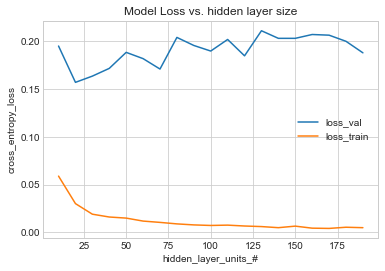

In [38]:
fig = plt.figure()
ax = plt.axes()
ax.plot(loss_val_2, label = 'loss_val')
ax.plot(loss_train_2, label = 'loss_train')
ax.legend()
plt.xlabel('hidden_layer_units_#') 
plt.ylabel('cross_entropy_loss') 
plt.title('Model Loss vs. hidden layer size')
fig.savefig("loss_cv_2.png",dpi = 400)

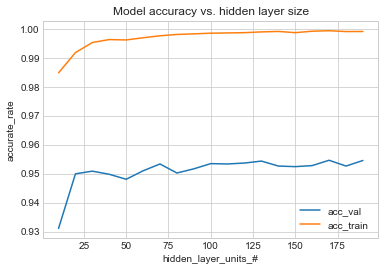

In [39]:
fig = plt.figure()
ax = plt.axes()
ax.plot(acc_val_2,label = 'acc_val')
ax.plot(acc_train_2, label = 'acc_train')
ax.legend()
plt.xlabel('hidden_layer_units_#') 
plt.ylabel('accurate_rate') 
plt.title('Model accuracy vs. hidden layer size')
fig.savefig("acc_cv_2.png",dpi=400)

In [52]:
# baseline model with two hidden layers
model_overfitting_2 = Sequential()
model_overfitting_2.add(Dense(50,input_shape = (max_num,)))
model_overfitting_2.add(Activation('relu'))
model_overfitting_2.add(Dense(50))
model_overfitting_2.add(Activation('relu'))
model_overfitting_2.add(Dense(num_classes))
model_overfitting_2.add(Activation('softmax'))
model_overfitting_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_overfitting_2 = model_overfitting_2.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_overfitting_2 = model_overfitting_2.evaluate(X_test,y_test, batch_size=200, verbose = 1)

base_train_acc_2 = hist_overfitting_2.history.get('acc')[-1]
base_test_acc_2 = score_overfitting_2[1]

Epoch 1/3
25000/25000 [==============================] - 7s 270us/step - loss: 0.3421 - acc: 0.8544
Epoch 2/3
25000/25000 [==============================] - 4s 158us/step - loss: 0.1223 - acc: 0.9559
Epoch 3/3
25000/25000 [==============================] - 3s 131us/step


In [53]:
print('The accurate rate of the overfitting model with two hidden layers on training dataset is')
print(base_train_acc_2)
print('The accurate rate of the overfitting model with two hidden layers on test dataset is')
print(base_test_acc_2)

The accurate rate of the overfitting model with two hidden layers on training dataset is
0.987520010471344
The accurate rate of the overfitting model with two hidden layers on test dataset is
0.8638800020217896


In [54]:
from tensorflow.keras.layers import Dropout
rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
loss_train_drop = []
acc_train_drop = []
loss_val_drop = []
acc_val_drop = []
for r in rate:
    model_drop = Sequential()
    model_drop.add(Dense(50,input_shape = (max_num,)))
    model_drop.add(Activation('relu'))
    model_drop.add(Dropout(r))
    model_drop.add(Dense(50))
    model_drop.add(Activation('relu'))
    model_drop.add(Dropout(r))
    model_drop.add(Dense(num_classes))
    model_drop.add(Activation('softmax'))
    model_drop.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    loss_val_cv = 0
    acc_val_cv = 0
    loss_train_cv = 0
    acc_train_cv = 0
    for train_cv_index, val_index in kf.split(X_train):
        X_train_cv = X_train[train_cv_index]
        y_train_cv = y_train[train_cv_index]
        X_val_cv = X_train[val_index]
        y_val_cv = y_train[val_index]
        hist = model_drop.fit(X_train_cv,y_train_cv,batch_size=200, epochs = 3)
        loss_train_cv = loss_train_cv + hist.history.get('loss')[-1]
        acc_train_cv = acc_train_cv + hist.history.get('acc')[-1]
        score_val_cv = model_drop.evaluate(X_val_cv,y_val_cv, batch_size=200, verbose = 1)
        loss_val_cv = loss_val_cv + score_val_cv[0]
        acc_val_cv = acc_val_cv + score_val_cv[1]
    loss_val_drop.append(loss_val_cv/3)
    acc_val_drop.append(acc_val_cv/3)
    loss_train_drop.append(loss_train_cv/3)
    acc_train_drop.append(acc_train_cv/3)
    

Epoch 1/3
16666/16666 [==============================] - 6s 342us/step - loss: 0.3881 - acc: 0.8276
Epoch 2/3
16666/16666 [==============================] - 3s 163us/step - loss: 0.1257 - acc: 0.9543
Epoch 3/3
8334/8334 [==============================] - 2s 222us/step
Epoch 1/3
16667/16667 [==============================] - 3s 165us/step - loss: 0.1950 - acc: 0.9328
Epoch 2/3
16667/16667 [==============================] - 3s 163us/step - loss: 0.0455 - acc: 0.9866
Epoch 3/3
8333/8333 [==============================] - 1s 90us/step
Epoch 1/3
16667/16667 [==============================] - 3s 165us/step - loss: 0.0411 - acc: 0.9861
Epoch 2/3
16667/16667 [==============================] - 3s 165us/step - loss: 0.0135 - acc: 0.9966
Epoch 3/3
8333/8333 [==============================] - 1s 93us/step
Epoch 1/3
16666/16666 [==============================] - 6s 338us/step - loss: 0.4107 - acc: 0.8174
Epoch 2/3
16666/16666 [==============================] - 3s 167us/step - loss: 0.1479 - acc: 0.

In [55]:
ix = rate
loss_train_drop= pd.Series(loss_train_drop, index = ix)
loss_val_drop = pd.Series(loss_val_drop, index = ix)
acc_train_drop = pd.Series(acc_train_drop, index = ix)
acc_val_drop = pd.Series(acc_val_drop, index = ix)

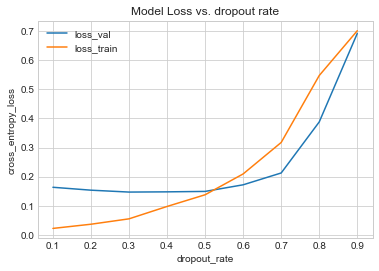

In [56]:
fig = plt.figure()
ax = plt.axes()
ax.plot(loss_val_drop, label = 'loss_val')
ax.plot(loss_train_drop, label = 'loss_train')
ax.legend()
plt.xlabel('dropout_rate') 
plt.ylabel('cross_entropy_loss') 
plt.title('Model Loss vs. dropout rate')
fig.savefig("drop_loss_cv_2.png",dpi = 400)

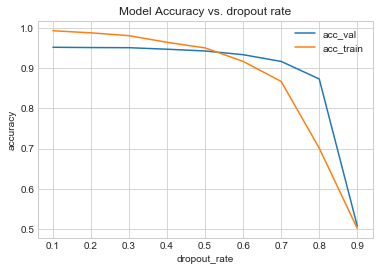

In [57]:
fig = plt.figure()
ax = plt.axes()
ax.plot(acc_val_drop, label = 'acc_val')
ax.plot(acc_train_drop, label = 'acc_train')
ax.legend()
plt.xlabel('dropout_rate') 
plt.ylabel('accuracy') 
plt.title('Model Accuracy vs. dropout rate')
fig.savefig("drop_acc_cv_2.png",dpi = 400)

In [60]:
model_drop_2 = Sequential()
model_drop_2.add(Dense(50,input_shape = (max_num,)))
model_drop_2.add(Activation('relu'))
model_drop_2.add(Dropout(0.5))
model_drop_2.add(Dense(50))
model_drop_2.add(Activation('relu'))
model_drop_2.add(Dropout(0.5))
model_drop_2.add(Dense(num_classes))
model_drop_2.add(Activation('softmax'))
model_drop_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_drop_2 = model_drop_2.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_drop_2 = model_drop_2.evaluate(X_test,y_test, batch_size=200, verbose = 1)

drop_train_acc_2 = hist_drop_2.history.get('acc')[-1]
drop_test_acc_2 = score_drop_2[1]

Epoch 1/3
25000/25000 [==============================] - 8s 304us/step - loss: 0.4674 - acc: 0.7780
Epoch 2/3
25000/25000 [==============================] - 4s 172us/step - loss: 0.2513 - acc: 0.9074
Epoch 3/3
25000/25000 [==============================] - 4s 155us/step


In [61]:
print('The accurate rate of the model with two hidden layers and dropout(0.5) on training dataset is')
print(drop_train_acc_2)
print('The accurate rate of the model with two hidden layers and dropout(0.5) on test dataset is')
print(drop_test_acc_2)

The accurate rate of the model with two hidden layers and dropout(0.5) on training dataset is
0.939479998588562
The accurate rate of the model with two hidden layers and dropout(0.5) on test dataset is
0.877079999923706


In [84]:
model_nn25_2 = Sequential()
model_nn25_2.add(Dense(25,input_shape = (max_num,)))
model_nn25_2.add(Activation('relu'))
model_nn25_2.add(Dense(25))
model_nn25_2.add(Activation('relu'))
model_nn25_2.add(Dense(num_classes))
model_nn25_2.add(Activation('softmax'))
model_nn25_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_nn25_2 = model_nn25_2.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_nn25_2 = model_nn25_2.evaluate(X_test,y_test, batch_size=200, verbose = 1)

nn25_train_acc_2 = hist_nn25_2.history.get('acc')[-1]
nn25_test_acc_2 = score_nn25_2[1]

Epoch 1/3
25000/25000 [==============================] - 22s 869us/step - loss: 0.3517 - acc: 0.8536
Epoch 2/3
25000/25000 [==============================] - 6s 249us/step - loss: 0.1441 - acc: 0.9484
Epoch 3/3
25000/25000 [==============================] - 12s 487us/step


In [85]:
print('The accurate rate of the model with two hidden layers(25units) on training dataset is')
print(drop_train_acc_2)
print('The accurate rate of the model with two hidden layers(25units) on test dataset is')
print(drop_test_acc_2)

The accurate rate of the model with two hidden layers(25units) on training dataset is
0.9673600010871887
The accurate rate of the model with two hidden layers(25units) on test dataset is
0.8725199995040893


In [62]:
model_drop_2 = Sequential()
model_drop_2.add(Dense(50,input_shape = (max_num,)))
model_drop_2.add(Activation('relu'))
model_drop_2.add(Dropout(0.4))
model_drop_2.add(Dense(50))
model_drop_2.add(Activation('relu'))
model_drop_2.add(Dropout(0.4))
model_drop_2.add(Dense(num_classes))
model_drop_2.add(Activation('softmax'))
model_drop_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_drop_2 = model_drop_2.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_drop_2 = model_drop_2.evaluate(X_test,y_test, batch_size=200, verbose = 1)

drop_train_acc_2 = hist_drop_2.history.get('acc')[-1]
drop_test_acc_2 = score_drop_2[1]

Epoch 1/3
25000/25000 [==============================] - 8s 309us/step - loss: 0.4405 - acc: 0.7981
Epoch 2/3
25000/25000 [==============================] - 5s 182us/step - loss: 0.2181 - acc: 0.9203
Epoch 3/3
25000/25000 [==============================] - 4s 150us/step


In [63]:
print('The accurate rate of the model with two hidden layers and dropout(0.4) on training dataset is')
print(drop_train_acc_2)
print('The accurate rate of the model with two hidden layers and dropout(0.4) on test dataset is')
print(drop_test_acc_2)

The accurate rate of the model with two hidden layers and dropout(0.4) on training dataset is
0.9491999969482422
The accurate rate of the model with two hidden layers and dropout(0.4) on test dataset is
0.8730800008773804


In [64]:
model_drop_2 = Sequential()
model_drop_2.add(Dense(50,input_shape = (max_num,)))
model_drop_2.add(Activation('relu'))
model_drop_2.add(Dropout(0.3))
model_drop_2.add(Dense(50))
model_drop_2.add(Activation('relu'))
model_drop_2.add(Dropout(0.3))
model_drop_2.add(Dense(num_classes))
model_drop_2.add(Activation('softmax'))
model_drop_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_drop_2 = model_drop_2.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_drop_2 = model_drop_2.evaluate(X_test,y_test, batch_size=200, verbose = 1)

drop_train_acc_2 = hist_drop_2.history.get('acc')[-1]
drop_test_acc_2 = score_drop_2[1]

Epoch 1/3
25000/25000 [==============================] - 8s 308us/step - loss: 0.4090 - acc: 0.8146
Epoch 2/3
25000/25000 [==============================] - 4s 166us/step - loss: 0.1834 - acc: 0.9328
Epoch 3/3
25000/25000 [==============================] - 4s 148us/step


In [65]:
print('The accurate rate of the model with two hidden layers and dropout(0.3) on training dataset is')
print(drop_train_acc_2)
print('The accurate rate of the model with two hidden layers and dropout(0.3) on test dataset is')
print(drop_test_acc_2)

The accurate rate of the model with two hidden layers and dropout(0.3) on training dataset is
0.9673600010871887
The accurate rate of the model with two hidden layers and dropout(0.3) on test dataset is
0.8725199995040893


In [67]:
lambda_list = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
loss_train_2_l1 = []
acc_train_2_l1 = []
loss_val_2_l1 = []
acc_val_2_l1 = []
for par in lambda_list:
    model_2_l1 = Sequential()
    model_2_l1.add(Dense(50,input_shape = (max_num,), kernel_regularizer = l1(par), bias_regularizer=l1(par)))
    model_2_l1.add(Activation('relu'))
    model_2_l1.add(Dense(50, kernel_regularizer = l1(par), bias_regularizer=l1(par)))
    model_2_l1.add(Activation('relu'))
    model_2_l1.add(Dense(num_classes, kernel_regularizer = l1(par), bias_regularizer=l1(par)))
    model_2_l1.add(Activation('softmax'))
    model_2_l1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    loss_val_cv = 0
    acc_val_cv = 0
    loss_train_cv = 0
    acc_train_cv = 0
    for train_cv_index, val_index in kf.split(X_train):
        X_train_cv = X_train[train_cv_index]
        y_train_cv = y_train[train_cv_index]
        X_val_cv = X_train[val_index]
        y_val_cv = y_train[val_index]
        hist = model_2_l1.fit(X_train_cv,y_train_cv,batch_size=200, epochs = 3)
        loss_train_cv = loss_train_cv + hist.history.get('loss')[-1]
        acc_train_cv = acc_train_cv + hist.history.get('acc')[-1]
        score_val_cv = model_2_l1.evaluate(X_val_cv,y_val_cv, batch_size=200, verbose = 1)
        loss_val_cv = loss_val_cv + score_val_cv[0]
        acc_val_cv = acc_val_cv + score_val_cv[1]
    loss_val_2_l1.append(loss_val_cv/3)
    acc_val_2_l1.append(acc_val_cv/3)
    loss_train_2_l1.append(loss_train_cv/3)
    acc_train_2_l1.append(acc_train_cv/3)

Epoch 1/3
16666/16666 [==============================] - 7s 402us/step - loss: 0.3948 - acc: 0.8295
Epoch 2/3
16666/16666 [==============================] - 3s 184us/step - loss: 0.1339 - acc: 0.9548
Epoch 3/3
8334/8334 [==============================] - 3s 311us/step
Epoch 1/3
16667/16667 [==============================] - 3s 189us/step - loss: 0.2059 - acc: 0.9323
Epoch 2/3
16667/16667 [==============================] - 3s 184us/step - loss: 0.0505 - acc: 0.9873
Epoch 3/3
8333/8333 [==============================] - 1s 102us/step
Epoch 1/3
16667/16667 [==============================] - 3s 176us/step - loss: 0.0477 - acc: 0.9878
Epoch 2/3
16667/16667 [==============================] - 3s 173us/step - loss: 0.0177 - acc: 0.9980
Epoch 3/3
8333/8333 [==============================] - 1s 99us/step
Epoch 1/3
16666/16666 [==============================] - 6s 379us/step - loss: 0.4162 - acc: 0.8459
Epoch 2/3
16666/16666 [==============================] - 3s 173us/step - loss: 0.1735 - acc: 0

In [68]:
l1_2_reg_cv = pd.DataFrame({'loss_train': loss_train_2_l1,
                          'loss_val': loss_val_2_l1,
                       'acc_train': acc_train_2_l1,
                        'acc_val':acc_val_2_l1,
                         'lambda':lambda_list}).set_index('lambda')
l1_2_reg_cv

,loss_train,loss_val,acc_train,acc_val
lambda,,,,
0.000001,0.027111,0.197342,0.994740,0.946803
0.000010,0.084224,0.267125,0.994780,0.942803
0.000100,0.285536,0.462369,0.985540,0.918402
0.001000,0.582214,0.661997,0.929919,0.886720
0.010000,1.322553,1.279183,0.873020,0.869440
0.100000,6.858770,6.491953,0.503460,0.500000


In [69]:
# indicating by the result of l1_reg_cv data frame, will set the lambda as 1e-5 for l1 norm regularization
model_2_l1 = Sequential()
model_2_l1.add(Dense(50,input_shape = (max_num,), kernel_regularizer = l1(1e-5), bias_regularizer=l1(1e-5)))
model_2_l1.add(Activation('relu'))
model_2_l1.add(Dense(50, kernel_regularizer = l1(1e-5), bias_regularizer=l1(1e-5)))
model_2_l1.add(Activation('relu'))
model_2_l1.add(Dense(num_classes, kernel_regularizer = l1(1e-5), bias_regularizer=l1(1e-5)))
model_2_l1.add(Activation('softmax'))
model_2_l1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_2_l1 = model_2_l1.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_2_l1 = model_2_l1.evaluate(X_test,y_test, batch_size=200, verbose = 1)

l1_train_acc_2 = hist_2_l1.history.get('acc')[-1]
l1_test_acc_2 = score_2_l1[1]

Epoch 1/3
25000/25000 [==============================] - 9s 351us/step - loss: 0.3950 - acc: 0.8576
Epoch 2/3
25000/25000 [==============================] - 4s 177us/step - loss: 0.1798 - acc: 0.9588
Epoch 3/3
25000/25000 [==============================] - 4s 163us/step


In [70]:
print('The accurate rate of the model with two hidden layers and l1 regularization on training dataset is')
print(l1_train_acc_2)
print('The accurate rate of the model with two hidden layers and l1 regularization on test dataset is')
print(l1_test_acc_2)

The accurate rate of the model with two hidden layers and l1 regularization on training dataset is
0.987320011138916
The accurate rate of the model with two hidden layers and l1 regularization on test dataset is
0.865840000629425


In [71]:
# indicating by the result of l1_reg_cv data frame, will set the lambda as 1e-6 for l1 norm regularization
model_2_l1 = Sequential()
model_2_l1.add(Dense(50,input_shape = (max_num,), kernel_regularizer = l1(1e-6), bias_regularizer=l1(1e-6)))
model_2_l1.add(Activation('relu'))
model_2_l1.add(Dense(50, kernel_regularizer = l1(1e-6), bias_regularizer=l1(1e-6)))
model_2_l1.add(Activation('relu'))
model_2_l1.add(Dense(num_classes, kernel_regularizer = l1(1e-6), bias_regularizer=l1(1e-6)))
model_2_l1.add(Activation('softmax'))
model_2_l1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_2_l1 = model_2_l1.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_2_l1 = model_2_l1.evaluate(X_test,y_test, batch_size=200, verbose = 1)

l1_train_acc_2 = hist_2_l1.history.get('acc')[-1]
l1_test_acc_2 = score_2_l1[1]

Epoch 1/3
25000/25000 [==============================] - 8s 338us/step - loss: 0.3470 - acc: 0.8552
Epoch 2/3
25000/25000 [==============================] - 4s 173us/step - loss: 0.1427 - acc: 0.9525
Epoch 3/3
25000/25000 [==============================] - 4s 161us/step


In [72]:
print('The accurate rate of the model with two hidden layers and l1 regularization on training dataset is')
print(l1_train_acc_2)
print('The accurate rate of the model with two hidden layers and l1 regularization on test dataset is')
print(l1_test_acc_2)

The accurate rate of the model with two hidden layers and l1 regularization on training dataset is
0.9826000151634217
The accurate rate of the model with two hidden layers and l1 regularization on test dataset is
0.8631199975013732


In [75]:
lambda_list = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
loss_train_2_l2 = []
acc_train_2_l2 = []
loss_val_2_l2 = []
acc_val_2_l2 = []
for par in lambda_list:
    model_2_l2 = Sequential()
    model_2_l2.add(Dense(50,input_shape = (max_num,), kernel_regularizer = l2(par), bias_regularizer=l2(par)))
    model_2_l2.add(Activation('relu'))
    model_2_l2.add(Dense(50, kernel_regularizer = l2(par), bias_regularizer=l2(par)))
    model_2_l2.add(Activation('relu'))
    model_2_l2.add(Dense(num_classes, kernel_regularizer = l2(par), bias_regularizer=l2(par)))
    model_2_l2.add(Activation('softmax'))
    model_2_l2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    loss_val_cv = 0
    acc_val_cv = 0
    loss_train_cv = 0
    acc_train_cv = 0
    for train_cv_index, val_index in kf.split(X_train):
        X_train_cv = X_train[train_cv_index]
        y_train_cv = y_train[train_cv_index]
        X_val_cv = X_train[val_index]
        y_val_cv = y_train[val_index]
        hist = model_2_l2.fit(X_train_cv,y_train_cv,batch_size=200, epochs = 3)
        loss_train_cv = loss_train_cv + hist.history.get('loss')[-1]
        acc_train_cv = acc_train_cv + hist.history.get('acc')[-1]
        score_val_cv = model_2_l2.evaluate(X_val_cv,y_val_cv, batch_size=200, verbose = 1)
        loss_val_cv = loss_val_cv + score_val_cv[0]
        acc_val_cv = acc_val_cv + score_val_cv[1]
    loss_val_2_l2.append(loss_val_cv/3)
    acc_val_2_l2.append(acc_val_cv/3)
    loss_train_2_l2.append(loss_train_cv/3)
    acc_train_2_l2.append(acc_train_cv/3)

Epoch 1/3
16666/16666 [==============================] - 7s 414us/step - loss: 0.3684 - acc: 0.8426
Epoch 2/3
16666/16666 [==============================] - 3s 172us/step - loss: 0.1094 - acc: 0.9639
Epoch 3/3
8334/8334 [==============================] - 2s 298us/step
Epoch 1/3
16667/16667 [==============================] - 3s 176us/step - loss: 0.1944 - acc: 0.9338
Epoch 2/3
16667/16667 [==============================] - 3s 175us/step - loss: 0.0430 - acc: 0.9873
Epoch 3/3
8333/8333 [==============================] - 1s 100us/step
Epoch 1/3
16667/16667 [==============================] - 3s 175us/step - loss: 0.0411 - acc: 0.9859
Epoch 2/3
16667/16667 [==============================] - 3s 174us/step - loss: 0.0106 - acc: 0.9978
Epoch 3/3
8333/8333 [==============================] - 1s 99us/step
Epoch 1/3
16666/16666 [==============================] - 7s 419us/step - loss: 0.3726 - acc: 0.8359
Epoch 2/3
16666/16666 [==============================] - 3s 177us/step - loss: 0.1180 - acc: 0

In [76]:
l2_2_reg_cv = pd.DataFrame({'loss_train': loss_train_2_l2,
                          'loss_val': loss_val_2_l2,
                       'acc_train': acc_train_2_l2,
                        'acc_val':acc_val_2_l2,
                         'lambda':lambda_list}).set_index('lambda')
l2_2_reg_cv

,loss_train,loss_val,acc_train,acc_val
lambda,,,,
0.000001,0.015571,0.182387,0.99614,0.950123
0.000010,0.018547,0.176901,0.99598,0.950683
0.000100,0.037256,0.205451,0.99642,0.951043
0.001000,0.133404,0.314742,0.99294,0.930482
0.010000,0.352425,0.496134,0.94188,0.877400
0.100000,0.769707,0.733524,0.88528,0.873720


In [78]:
# indicating by the result of l2_2_reg_cv data frame, will set the lambda as 1e-4 for l2 norm regularization
model_2_l2 = Sequential()
model_2_l2.add(Dense(50,input_shape = (max_num,), kernel_regularizer = l2(1e-4), bias_regularizer=l2(1e-4)))
model_2_l2.add(Activation('relu'))
model_2_l2.add(Dense(50, kernel_regularizer = l2(1e-4), bias_regularizer=l2(1e-4)))
model_2_l2.add(Activation('relu'))
model_2_l2.add(Dense(num_classes, kernel_regularizer = l2(1e-4), bias_regularizer=l2(1e-4)))
model_2_l2.add(Activation('softmax'))
model_2_l2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_2_l2 = model_2_l2.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_2_l2 = model_2_l2.evaluate(X_test,y_test, batch_size=200, verbose = 1)

l2_train_acc_2 = hist_2_l2.history.get('acc')[-1]
l2_test_acc_2 = score_2_l2[1]

Epoch 1/3
25000/25000 [==============================] - 9s 342us/step - loss: 0.3527 - acc: 0.8592
Epoch 2/3
25000/25000 [==============================] - 4s 164us/step - loss: 0.1344 - acc: 0.9594
Epoch 3/3
25000/25000 [==============================] - 4s 167us/step


In [79]:
print('The accurate rate of the model with two hidden layers and l2 regularization on training dataset is')
print(l2_train_acc_2)
print('The accurate rate of the model with two hidden layers and l2 regularization on test dataset is')
print(l2_test_acc_2)

The accurate rate of the model with two hidden layers and l2 regularization on training dataset is
0.988760009765625
The accurate rate of the model with two hidden layers and l2 regularization on test dataset is
0.862720000743866


In [80]:
# indicating by the result of l2_2_reg_cv data frame, will set the lambda as 1e-5 for l2 norm regularization
model_2_l2 = Sequential()
model_2_l2.add(Dense(50,input_shape = (max_num,), kernel_regularizer = l2(1e-5), bias_regularizer=l2(1e-5)))
model_2_l2.add(Activation('relu'))
model_2_l2.add(Dense(50, kernel_regularizer = l2(1e-5), bias_regularizer=l2(1e-5)))
model_2_l2.add(Activation('relu'))
model_2_l2.add(Dense(num_classes, kernel_regularizer = l2(1e-5), bias_regularizer=l2(1e-5)))
model_2_l2.add(Activation('softmax'))
model_2_l2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_2_l2 = model_2_l2.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_2_l2 = model_2_l2.evaluate(X_test,y_test, batch_size=200, verbose = 1)

l2_train_acc_2 = hist_2_l2.history.get('acc')[-1]
l2_test_acc_2 = score_2_l2[1]

Epoch 1/3
25000/25000 [==============================] - 8s 340us/step - loss: 0.3385 - acc: 0.8563
Epoch 2/3
25000/25000 [==============================] - 4s 167us/step - loss: 0.1322 - acc: 0.9526
Epoch 3/3
25000/25000 [==============================] - 4s 165us/step


In [81]:
print('The accurate rate of the model with two hidden layers and l2 regularization on training dataset is')
print(l2_train_acc_2)
print('The accurate rate of the model with two hidden layers and l2 regularization on test dataset is')
print(l2_test_acc_2)

The accurate rate of the model with two hidden layers and l2 regularization on training dataset is
0.9823200106620789
The accurate rate of the model with two hidden layers and l2 regularization on test dataset is
0.8600399994850159


In [83]:
print(model_2_l2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_258 (Dense)            (None, 50)                500050    
_________________________________________________________________
activation_210 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_259 (Dense)            (None, 50)                2550      
_________________________________________________________________
activation_211 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_260 (Dense)            (None, 2)                 102       
_________________________________________________________________
activation_212 (Activation)  (None, 2)                 0         
Total params: 502,702
Trainable params: 502,702
Non-trainable params: 0
_________________________________________________________________
None

### augment the training dataset

In [3]:
data = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2)

In [5]:
num_classes = max(y_train) + 1
print(num_classes)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

max_num = 10000
tokenizer = Tokenizer(num_words=max_num)
tokenizer.fit_on_sequences(X_train)
X_train = tokenizer.sequences_to_matrix(X_train, mode = 'tfidf')
X_test = tokenizer.sequences_to_matrix(X_test, mode = 'tfidf')

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train.shape

2


KFold(n_splits=3, random_state=None, shuffle=True)

In [6]:
# the baseline to compare with
model_overfitting = Sequential()
model_overfitting.add(Dense(250,input_shape = (max_num,)))
model_overfitting.add(Activation('relu'))
model_overfitting.add(Dense(num_classes))
model_overfitting.add(Activation('softmax'))
model_overfitting.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_overfitting = model_overfitting.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_overfitting = model_overfitting.evaluate(X_test,y_test, batch_size=200, verbose = 1)

base_train_acc = hist_overfitting.history.get('acc')[-1]
base_test_acc = score_overfitting[1]

print('The accurate rate of the overfitting model on training dataset is')
print(base_train_acc)
print('The accurate rate of the overfitting model on test dataset is')
print(base_test_acc)

Epoch 1/3
40000/40000 [==============================] - 22s 553us/step - loss: 0.3048 - acc: 0.8711
Epoch 2/3
40000/40000 [==============================] - 21s 518us/step - loss: 0.0810 - acc: 0.9741
Epoch 3/3
10000/10000 [==============================] - 2s 232us/step
The accurate rate of the overfitting model on training dataset is
0.9971000027656555
The accurate rate of the overfitting model on test dataset is
0.8960999977588654


In [7]:
# baseline model with two hidden layers
model_overfitting_2 = Sequential()
model_overfitting_2.add(Dense(50,input_shape = (max_num,)))
model_overfitting_2.add(Activation('relu'))
model_overfitting_2.add(Dense(50))
model_overfitting_2.add(Activation('relu'))
model_overfitting_2.add(Dense(num_classes))
model_overfitting_2.add(Activation('softmax'))
model_overfitting_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist_overfitting_2 = model_overfitting_2.fit(X_train,y_train, batch_size=200, epochs = 3, verbose = 1)
score_overfitting_2 = model_overfitting_2.evaluate(X_test,y_test, batch_size=200, verbose = 1)

base_train_acc_2 = hist_overfitting_2.history.get('acc')[-1]
base_test_acc_2 = score_overfitting_2[1]

print('The accurate rate of the overfitting model with two hidden layers on training dataset is')
print(base_train_acc_2)
print('The accurate rate of the overfitting model with two hidden layers on test dataset is')
print(base_test_acc_2)

Epoch 1/3
40000/40000 [==============================] - 10s 258us/step - loss: 0.3205 - acc: 0.8643
Epoch 2/3
40000/40000 [==============================] - 9s 227us/step - loss: 0.1456 - acc: 0.9445
Epoch 3/3
10000/10000 [==============================] - 2s 169us/step
The accurate rate of the overfitting model with two hidden layers on training dataset is
0.9799250122904778
The accurate rate of the overfitting model with two hidden layers on test dataset is
0.8881999969482421
